# Closed Form Solution of Linear Regression

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression

In [119]:
# Generate Dataset

X,Y = make_regression(n_samples= 400,n_features=1,n_informative=1,noise=1.8,random_state=11)
print(X.shape)
#print(Y.shape)

Y = Y.reshape((-1,1))
print(Y.shape)

(400, 1)
(400, 1)


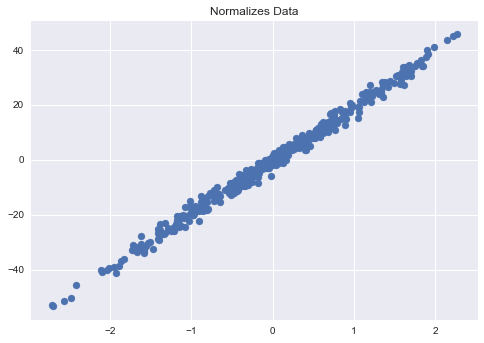

In [120]:
#Normalize

X = (X - X.mean())/X.std()

# Visualize
plt.figure()
plt.scatter(X,Y)
plt.title("Normalizes Data")
plt.show()

In [121]:
# np.ones will generate a matrix containing elements as "1".
ones = np.ones((X.shape[0],1))

# np.hstack will horizontally join both the matrix X and ones . 
X_ = np.hstack((X,ones))

print(X_.shape)

print(X_[:5,:])

(400, 2)
[[-0.86881353  1.        ]
 [ 1.04796658  1.        ]
 [-0.2019676   1.        ]
 [-0.34017061  1.        ]
 [ 0.13317349  1.        ]]


In [122]:
# np.dot will return a dotproduct of X and theta

def predict(X,theta):
    
    # Y(predicted) = X.Q
    return np.dot(X,theta)

def getThetaClosedForm(X,Y):
    
    # As previously we defined Y as a vector , so we'r suppose to convert it into a matrix.
    Y = np.mat(Y) 
    
    
    #               MAIN FORMULAE
    #   Q     = (X(Transpose).X)*(X(Transpose).Y)
    # theta   =   firstPart     *   secondPart
    
    firstPart = np.dot(X.T,X)
    secondPart = np.dot(X.T,Y)
    
    # linalg => Linear Algebra; pinv => pseudo Inverse 
    theta = np.linalg.pinv(firstPart)*secondPart
    return theta

In [123]:
theta = getThetaClosedForm(X_,Y)
print(theta)



[[19.45877082]
 [-0.29187892]]


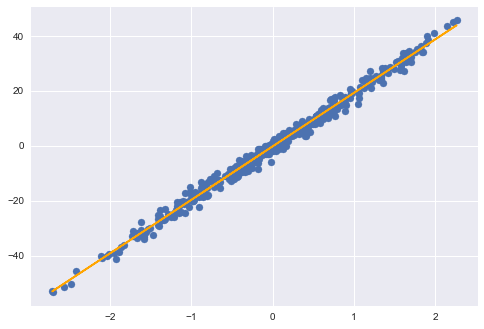

In [124]:
plt.scatter(X,Y)
plt.plot(X,predict(X_,theta),color='orange')
plt.show()

# Locally Weighted Regression


# Lowess Implementation 1 - Data Preperation

In [147]:
n = 99
# generate dataset

X = np.linspace(0, 3, num=n)
Y = np.log(np.abs(X ** 2 -1) + .5)
# jitter X
X += np.random.normal(scale=.05, size=n)

X = X.reshape((99,1))
Y = Y.reshape((99,1))

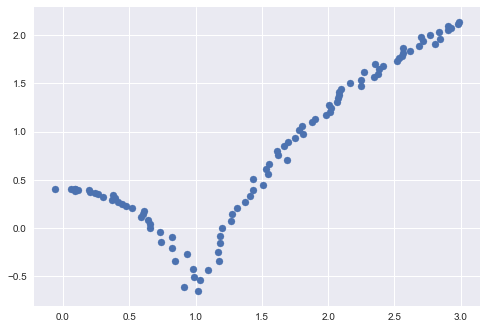

In [148]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

# Lowess Implementation 2 - Computing W

In [149]:
X = X.reshape((99,1))
Y = Y.reshape((99,1))


In [150]:
def getW(query_point,X,tau):
    m = X.shape[0]
    W = np.mat(np.eye(m))
    
    for i in range(m):
        xi = X[i]
        x = query_point
        
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
        
    return W


In [151]:
X = np.mat(X)
Y = np.mat(Y)
m = X.shape[0]

W = getW(-1,X,1)
print(W.shape)
print(W)

(99, 99)
[[6.42326065e-01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.71709485e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.51660923e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.87645309e-04
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.68347229e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.55252877e-04]]


# Lowess Implementation 3 -  Making Prediction

In [152]:
def predict(X,Y,query_point,tau):
    ones = np.ones((m,1))
    
    X_ = np.hstack((X,ones))
    
    qx = np.mat((query_point,1))
    
    W = getW(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

In [156]:
theta,pred = predict(X,Y,2.0,1.0)

In [157]:
print(theta)

[[ 0.98145878]
 [-0.80239225]]


In [158]:
print(pred)

[[1.16052532]]


# Lowess Implementation 4 - Effect of Bandwidth Parameter(i.e. tau) 

In [167]:
def plotPrediction(tau):
    X_test = np.linspace(0,3,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
    
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

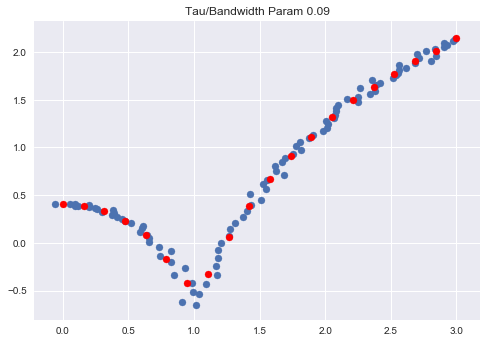

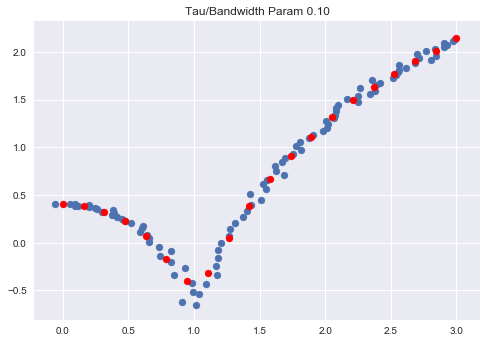

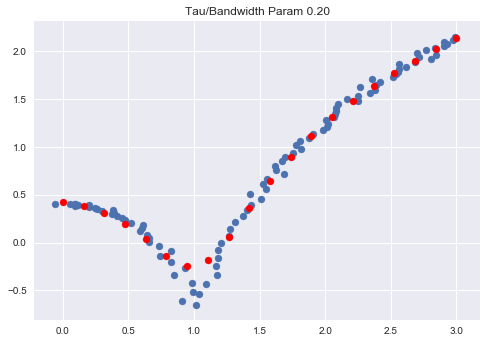

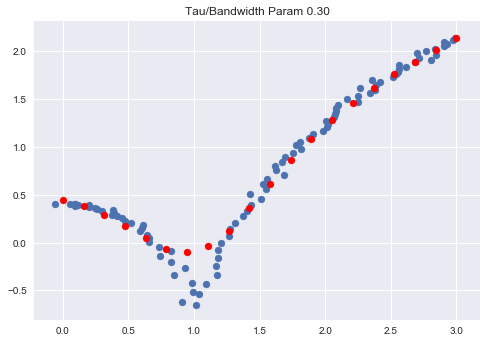

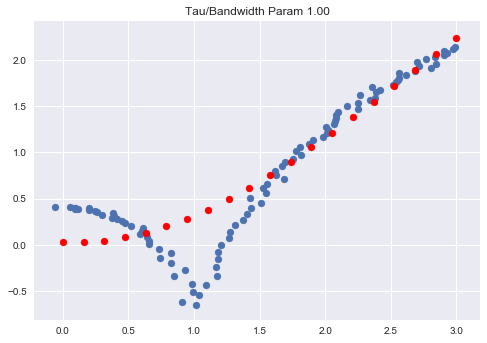

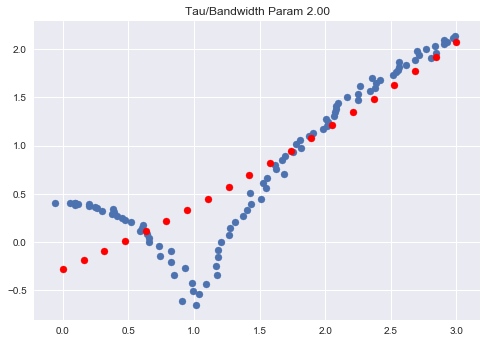

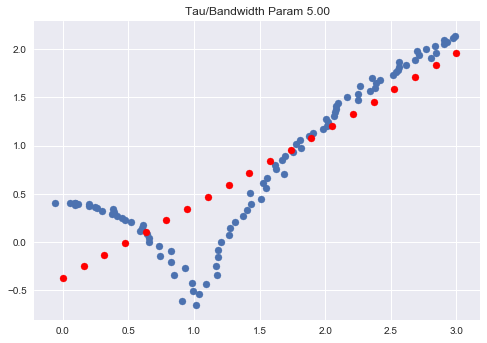

In [168]:
taus = [0.09,0.1,0.2,0.3,1,2,5]

for t in taus:
    plotPrediction(t)